In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## Univariate Linear Regression

In the previous assignment you implemented the cost function and one step of gradient descent. Now it's time to put your code together and implement to full gradient descent algorithm. Please reuse the implementations of your functions from the previous assignment, but make sure they are correct. 

Make sure to comment your code!

In [45]:
#Make a prediction function h
def predict(x,theta):
    justones = numpy.ones(x.shape)
    xones = (numpy.stack((justones,x), axis=-1))
    x_predict = theta@xones.T
    return x_predict

In [46]:
#Use the output of that function to compute the cost function J:
def cost(x_predict,y):
    sqerror = (x_predict - y)**2
    result = 1/(2 * x.size) * sqerror.sum()
    return result

In [73]:
#Create a function that returns the gradient values, given h (x_predict), theta, alhpa, y and x:
def gradDescentStep(x_predict, theta, alpha, y, x):
    costf = x_predict - y
    temp0 = theta[0] - alpha * 1/x.size * costf.sum()
    costf = (x_predict - y) * x
    temp1 = theta[1] - alpha * 1/x.size * costf.sum()
    theta = numpy.array([temp0, temp1])
    return theta

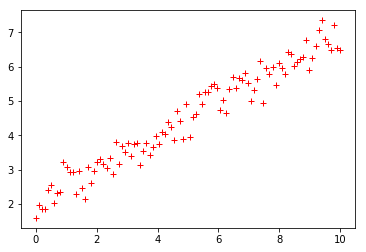

In [80]:
# Repeat the gradient descent step untill it converges.
# These are some default parameters, see how playing with them affects the behavior
alpha = 0.1
theta0 = 0
theta1 = 1
iterations = 10
m = 100;
a = 0.5
b = 2
x = linspace(0,10,m)
y = a * x + b + 0.3 * random.randn(m)
plot(x, y, 'r+');

#Fill in the stopcondition yourself
#stopcondition = 


In [88]:
i = 0
#cost = 10
theta_values = numpy.empty([iterations + 1, 2])
theta_values[0, 0], theta_values[0, 1] = theta0, theta1

#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations): #and (cost > stopcondition):
    theta_values[i+1] = gradDescentStep(predict(x, theta_values[i]), theta_values[i], alpha, y, x)
 #gradDescentStep(predict(x, theta_values[i, , theta1), alpha, y, x)[1]
    i = i +1
    #Put everything together here

print(gradDescentStep(predict(x, theta_values[0]), theta_values[0], alpha, y, x))
#print(theta_values)
    
#plt.plot(x,predict(x,theta0,theta1))
#plt.plot(x,y,'o')
#plt.show()

[-0.04997873  0.32165353]


## Analysis

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.